## SaaS - Sales Capstone 2 Purwadhika

This project is part of the Purwadhika Data Science Program.  
The main objective is to train us as future Data Analysts by applying end-to-end data analysis, data visualization, and business storytelling.  

In this project, we will learn how to:  
- Clean and prepare real-world sales data.  
- Explore and analyze the dataset to uncover meaningful insights.  
- Visualize the results using Python and Tableau.  
- Present our findings and recommendations in a structured business context.


In [1]:
#import library dasar

import pandas as pd
import numpy as np

#for visualitation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

## Background

Software as a Service (SaaS) adalah model bisnis di mana software ditawarkan dalam bentuk layanan berbasis langganan. Model ini semakin populer karena memberikan fleksibilitas bagi customer dan recurring revenue bagi perusahaan.

Amazon Web Services (AWS) adalah salah satu penyedia SaaS terbesar di dunia, menyediakan lebih dari 200 layanan cloud untuk berbagai industri. Dataset yang digunakan dalam project ini adalah data penjualan AWS SaaS, yang mencakup informasi mengenai produk, customer, sales, profit, discount, quantity, serta dimensi geografis dan waktu.

Analisis data ini penting untuk membantu perusahaan dalam:
- Memahami tren penjualan dan profit dari tahun ke tahun.
- Mengetahui produk dan customer yang paling profitable maupun yang merugikan.
- Mengevaluasi pengaruh discount terhadap profit margin.
- Mengidentifikasi region atau subregion yang underperforming.
- Memberikan rekomendasi strategi bisnis untuk meningkatkan profitabilitas dan mengurangi risiko kerugian.


In [2]:
#baca data SaaS-Sales

df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [3]:
#check data nya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
#check data shape dulu

print(df.shape)

(9994, 19)


In [5]:
#check jumlah missing value

df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


In [6]:
#check jumlah duplikat

df.duplicated().sum()

np.int64(0)

In [7]:
#check statistik descpritif untuk kolom numerik

df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# pastikan baca ulang sebagai string
df_raw = pd.read_csv('/content/SaaS-Sales.csv', dtype={'Date Key': 'string'}, keep_default_na=False)

# bersihkan jadi 8 digit YYYYMMDD
datekey_str = (df_raw['Date Key']
               .astype(str)
               .str.strip()
               .str.replace(r'[^0-9]', '', regex=True)  # buang selain digit
               .str.extract(r'(\d{8})', expand=False))   # ambil 8 digit

# konversi ke datetime
df_raw['Date Key'] = pd.to_datetime(datekey_str, format='%Y%m%d', errors='coerce')

# konversi Order Date juga
df_raw['Order Date'] = pd.to_datetime(df_raw['Order Date'], errors='coerce')

# fallback: kalau Date Key kosong tapi Order Date ada, pakai Order Date
mask = df_raw['Date Key'].isna() & df_raw['Order Date'].notna()
df_raw.loc[mask, 'Date Key'] = df_raw.loc[mask, 'Order Date']

# ganti df utama kita
df = df_raw.copy()

# cek hasil
print(df[['Date Key','Order Date']].head(12))
print("Jumlah NaT di Date Key:", df['Date Key'].isna().sum())

     Date Key Order Date
0  2022-11-09 2022-11-09
1  2022-11-09 2022-11-09
2  2022-06-13 2022-06-13
3  2021-10-11 2021-10-11
4  2021-10-11 2021-10-11
5  2020-06-09 2020-06-09
6  2020-06-09 2020-06-09
7  2020-06-09 2020-06-09
8  2020-06-09 2020-06-09
9  2020-06-09 2020-06-09
10 2020-06-09 2020-06-09
11 2020-06-09 2020-06-09
Jumlah NaT di Date Key: 0


In [9]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [10]:
#jumlah missing & presentase

missing_values = df.isna().sum()
missing_precentage = (df.isna().mean()*100).round(2)
audit_missing = pd.concat([missing_values,missing_precentage],axis=1,keys=['missing_values','missing_precentage'])
audit_missing.columns = ['missing count' , 'missing_%']
print(audit_missing)

              missing count  missing_%
Row ID                    0        0.0
Order ID                  0        0.0
Order Date                0        0.0
Date Key                  0        0.0
Contact Name              0        0.0
Country                   0        0.0
City                      0        0.0
Region                    0        0.0
Subregion                 0        0.0
Customer                  0        0.0
Customer ID               0        0.0
Industry                  0        0.0
Segment                   0        0.0
Product                   0        0.0
License                   0        0.0
Sales                     0        0.0
Quantity                  0        0.0
Discount                  0        0.0
Profit                    0        0.0


In [11]:
#check duplikasi

print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


In [12]:
#check apakah ada quantityy < 1

invalid_qty = df[df['Quantity'] < 1]
print(invalid_qty)
print("Jumlah Quantity < 1:", len(invalid_qty))

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: []
Jumlah Quantity < 1: 0


In [13]:
#check sales apakah ada yang negative atau sales < 1

invalid_sales = df[df['Sales'] < 1]
print(invalid_sales)
print("Jumlah Sales < 1:", len(invalid_sales))

      Row ID          Order ID Order Date   Date Key    Contact Name  \
2106    2107   APJ-2020-152723 2020-09-26 2020-09-26    Ruth Vaughan   
2761    2762  AMER-2023-126536 2023-10-13 2023-10-13      Sean Bower   
4101    4102   APJ-2023-102288 2023-06-20 2023-06-20     Pippa Brown   
4711    4712  EMEA-2020-112403 2020-03-31 2020-03-31  Nicola Pullman   
7548    7549   APJ-2020-103492 2020-10-10 2020-10-10   Stewart Vance   
8033    8034   APJ-2021-119690 2021-06-25 2021-06-25  Donna Hemmings   
8658    8659   APJ-2022-168361 2022-06-22 2022-06-22      Maria Dyer   
9292    9293   APJ-2023-124114 2023-03-03 2023-03-03     Claire Carr   

            Country         City Region Subregion                   Customer  \
2106          Japan      Sapporo    APJ      JAPN                 Ford Motor   
2761  United States  Los Angeles   AMER     NAMER  HonHai Precision Industry   
4101          Japan        Tokyo    APJ      JAPN                 Volkswagen   
4711         France        Pari

In [14]:
#karena ada 8 invalid sales jadi kita akan drop aja

before = len(df)
df = df[df['Sales'] >= 1]
after = len(df)
print("Jumlah baris sebelum:", before)
print("Jumlah baris setelah:", after)
print("Jumlah baris yang dihapus:", before - after)

Jumlah baris sebelum: 9994
Jumlah baris setelah: 9986
Jumlah baris yang dihapus: 8


In [15]:
#check kembali data yang sudah di bersihkan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9986 non-null   int64         
 1   Order ID      9986 non-null   object        
 2   Order Date    9986 non-null   datetime64[ns]
 3   Date Key      9986 non-null   datetime64[ns]
 4   Contact Name  9986 non-null   object        
 5   Country       9986 non-null   object        
 6   City          9986 non-null   object        
 7   Region        9986 non-null   object        
 8   Subregion     9986 non-null   object        
 9   Customer      9986 non-null   object        
 10  Customer ID   9986 non-null   int64         
 11  Industry      9986 non-null   object        
 12  Segment       9986 non-null   object        
 13  Product       9986 non-null   object        
 14  License       9986 non-null   object        
 15  Sales         9986 non-null   float64      

In [16]:
#check colomn numerik di columns yang berisikan numerik

numeric_colomns = ['Sales' , 'Quantity', 'Discount', 'Profit']
for c in numeric_colomns:
  df[c] = pd.to_numeric(df[c], errors='coerce')

print(df[numeric_colomns].dtypes)

Sales       float64
Quantity      int64
Discount    float64
Profit      float64
dtype: object


/tmp/ipython-input-4274678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = pd.to_numeric(df[c], errors='coerce')


In [17]:
# jumlah subregion unik
total_subregion = df['Subregion'].nunique()
print("Jumlah total Subregion:", total_subregion)

# daftar semua subregion
list_subregion = df['Subregion'].unique()
print("Daftar Subregion:", list_subregion)


Jumlah total Subregion: 12
Daftar Subregion: ['UKIR' 'NAMER' 'EU-WEST' 'NOR' 'JAPN' 'EU' 'MEA' 'LATAM' 'ANZ' 'APAC'
 'IND' 'EU-EAST']


In [36]:
# simpan dataset bersih ke CSV
df.to_csv("SaaS_Sales_Clean.csv", index=False)

print("✅ File sudah disimpan: SaaS_Sales_Clean.csv")


✅ File sudah disimpan: SaaS_Sales_Clean.csv


## Data Cleansing
Langkah-langkah yang dilakukan:
- Mengecek missing values dan duplikat → hasil: tidak ada.
- Menghapus transaksi dengan Sales < 1 (8 baris).
- Memastikan Quantity ≥ 1.
- Validasi Discount agar berada di rentang 0–1.
- Flagging outlier Sales dan Profit.
- Konversi Date Key ke format datetime, membuat fitur turunan: year, month, quarter.


## PROBLEM STATEMENT

Dalam industri Software as a Service (SaaS), memahami pola perilaku penjualan, profitabilitas dan perilaku customer sangat penting untuk mendukung strategi bisnis.

Dataset ini memberikan informasi mengenai transaksi yang mencakup product,customer,discount, profit dan sales, serta dimensi geografis (region dan subregion) dan tipe bisnis  (industry/segment)

Berdasarkan data yang sudah saya cleansing ini akan menjawab beberapa pertanyaan

1. **Sales dan Profit Trend**
- Bagaimana penjualan dan sales dari tahun ke tahun
- Apakah terdapat pola musiman pada sales

2. **Discount and Probability**
- Bagaimana tingkat pengaruh discount pada margin
- Apakah discount besar bisa benar-benar meningkatkan penjualan

3. **Product and Analysis**
- Product mana yang paling sering profitable dan produk mana saja yang paling sering merugi?
- Customer atau indsutry mana yang benar-benar loyal dan memberikan kontrbusi yang besar

4 **Geographical dan Business Type Performance**
-Subregion mana yang memberikan kontribusi terbesar terhadap penjualan dan profit, dan mana yang underperformance.
-Apakah ada pola tertentu di mana sub-region teretentu underperformance karena industry tertentu
- Apa yang dilakukan untuk meningkatkan performa pada sub-region yang lemah:
 - Menggambungkan strategi dengan subregion sekitar
 - Mencari industry baru di daerah tersebut

In [19]:
# statistik deskriptif untuk kolom numerik
df[['Sales','Profit','Discount','Quantity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9986.0,230.041501,623.460986,1.044,17.340000,54.7400,209.970,22638.480
Profit,9986.0,28.680655,234.352428,-6599.978,1.735775,8.6733,29.364,8399.976
Discount,9986.0,0.155777,0.205853,0.000,0.000000,0.2000,0.200,0.800
Quantity,9986.0,3.791708,2.224702,1.000,2.000000,3.0000,5.000,14.000


**Descriptive Statistics**

- Distribusi Sales → skewed, mayoritas transaksi kecil, ada big deals.  
  *Implikasi: revenue banyak bergantung pada segelintir transaksi besar (risk concentration).*  

- Distribusi Profit → mayoritas kecil/negatif, ada outlier besar.  
  *Implikasi: banyak transaksi yang tidak profitable, perlu evaluasi pricing.*  

- Distribusi Discount → mayoritas 0–20%, ada beberapa ekstrem >70%.  
  *Implikasi: diskon terlalu tinggi bisa jadi penyebab kerugian.*  

- Quantity → mayoritas 1–3 unit.  
  *Implikasi: transaksi rata-rata kecil, sesuai model SaaS (subscription per license).*  


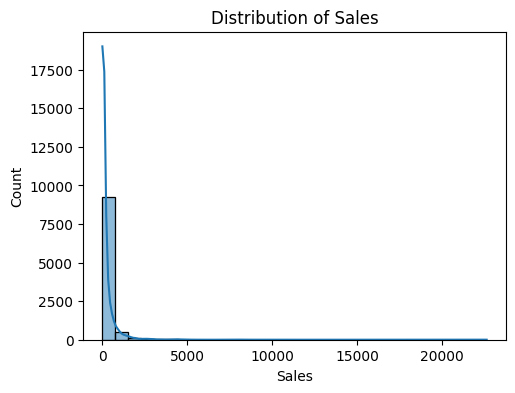

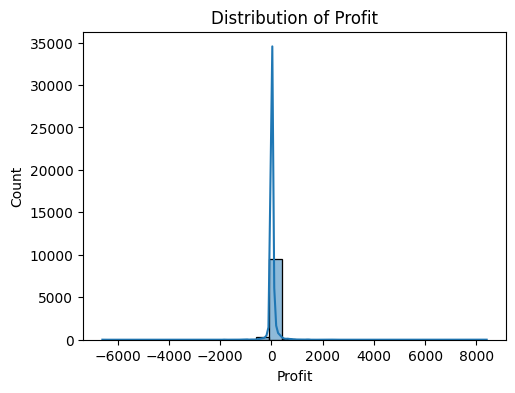

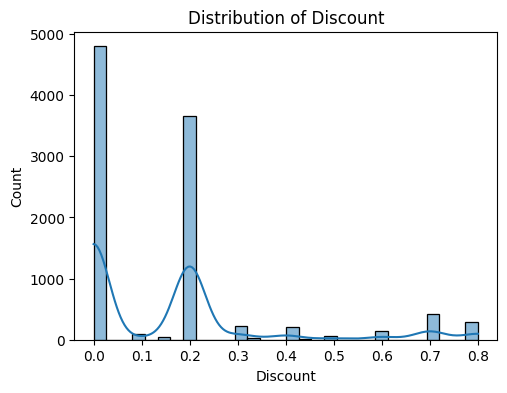

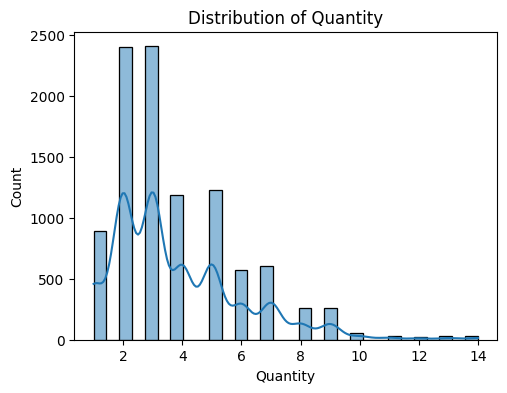

In [20]:

num_cols = ['Sales','Profit','Discount','Quantity']

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.show

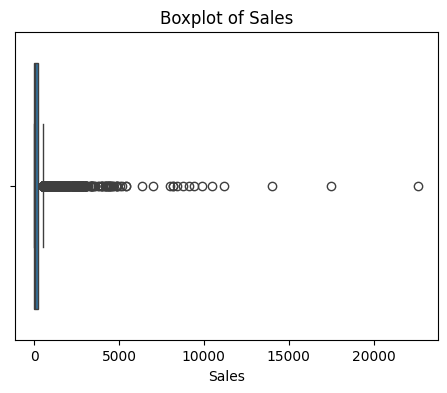

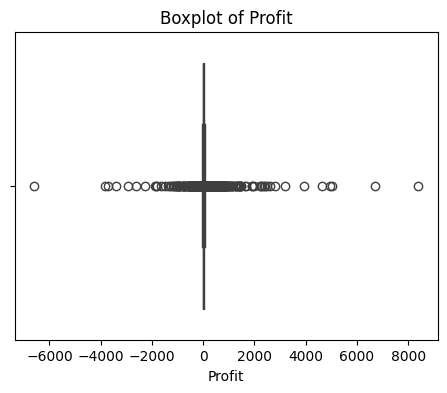

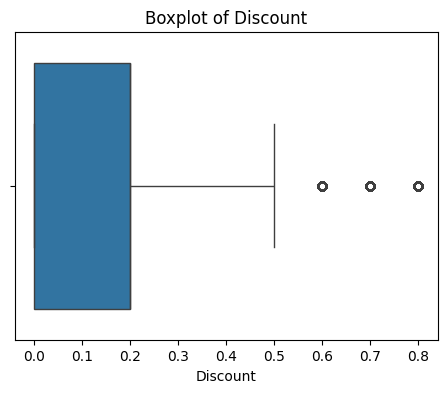

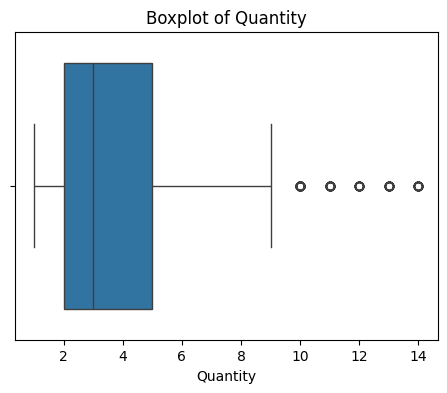

In [21]:

num_cols = ['Sales','Profit','Discount','Quantity']

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show

/tmp/ipython-input-3206830321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['Order Date'].dt.to_period('M').astype(str)


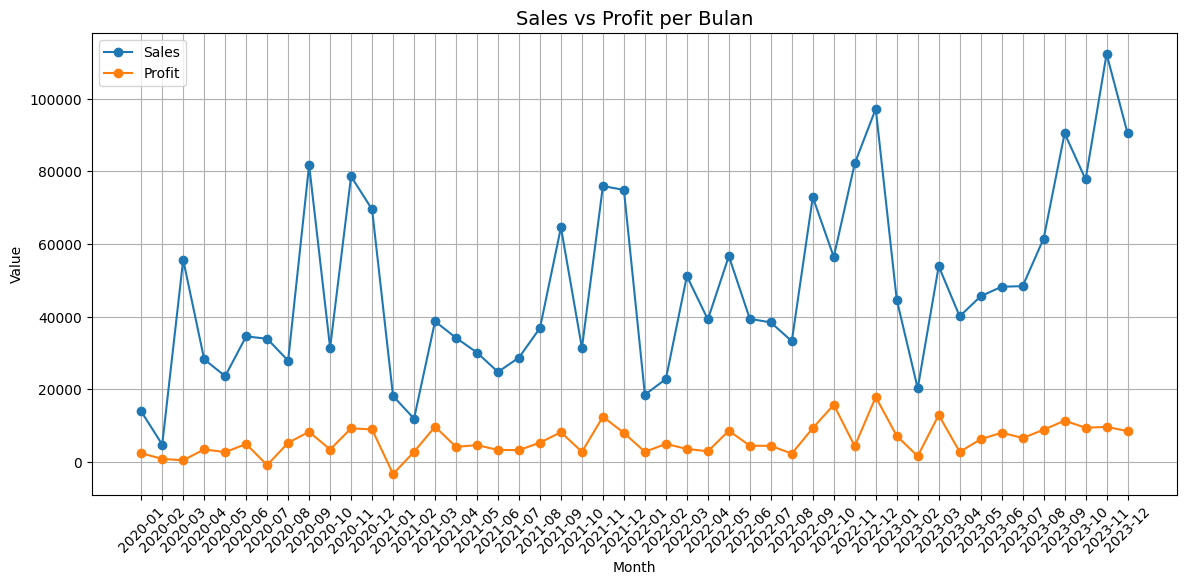

,year_month,Sales,Profit
0,2020-01,13946.2290,2446.7711
1,2020-02,4810.5580,865.7280
2,2020-03,55690.1570,499.3263
3,2020-04,28295.3450,3488.8352
4,2020-05,23648.2870,2738.7096
5,2020-06,34595.1276,4976.5244
6,2020-07,33946.3930,-841.4826
7,2020-08,27909.4685,5318.1050
8,2020-09,81776.4748,8329.5010
9,2020-10,31452.4950,3449.8288


In [22]:
import matplotlib.pyplot as plt

# bikin kolom Year-Month
df['year_month'] = df['Order Date'].dt.to_period('M').astype(str)

# group by per bulan
monthly = df.groupby('year_month')[['Sales','Profit']].sum().reset_index()

# line chart
plt.figure(figsize=(14,6))
plt.plot(monthly['year_month'], monthly['Sales'], marker='o', label='Sales')
plt.plot(monthly['year_month'], monthly['Profit'], marker='o', label='Profit')

plt.title("Sales vs Profit per Bulan", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# tampilkan summary tabel
display(monthly.head(12))  # contoh 12 bulan pertama


### Time Series Analysis
- Sales dan Profit per tahun → naik secara tren, sempat turun 2021 (efek pandemi).
- Sales dan Profit per bulan → seasonality jelas, peak di Desember, drop di Februari.

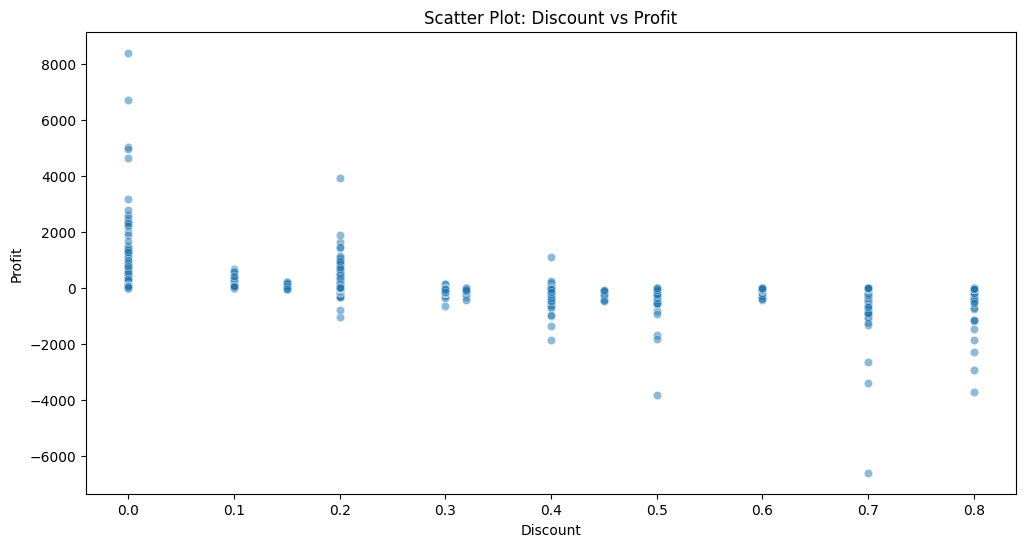

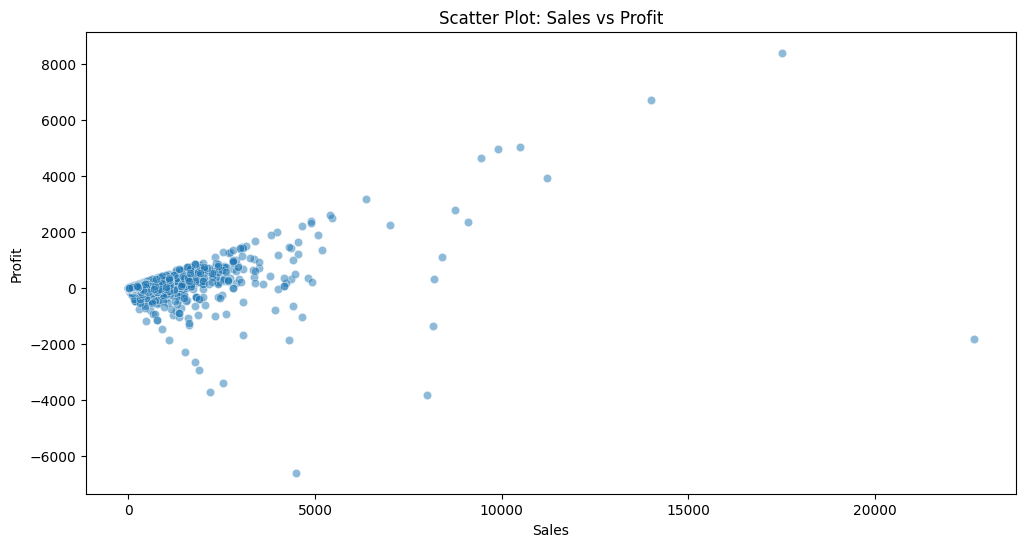

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title("Scatter Plot: Discount vs Profit")
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title("Scatter Plot: Sales vs Profit")
plt.show()


## Scatter Plot Insights

### Discount vs Profit
- Terlihat hubungan **negatif**: semakin tinggi discount, profit cenderung turun bahkan negatif.
- Beberapa titik dengan discount ekstrem (>70%) menghasilkan profit sangat rendah atau rugi besar.
- Hal ini menunjukkan bahwa **diskon terlalu agresif adalah faktor utama kerugian**.

### Sales vs Profit
- Secara umum, semakin tinggi Sales, profit ikut meningkat.
- Namun, ada banyak **outlier**: transaksi dengan Sales besar tapi profit justru negatif.
- Insight: **High Sales ≠ High Profit**. Tidak semua transaksi besar menghasilkan keuntungan, kemungkinan karena faktor diskon besar atau margin tipis pada produk tertentu.


In [24]:
# Top 10 transaksi dengan Sales terbesar
top10_sales = df.sort_values(by='Sales', ascending=False).head(10)

print("Top 10 Transaksi dengan Sales Tertinggi:")
display(top10_sales[['Order ID','Customer','Industry','Region','Subregion',
                     'Product','Sales','Profit','Discount']])


Top 10 Transaksi dengan Sales Tertinggi:


,Order ID,Customer,Industry,Region,Subregion,Product,Sales,Profit,Discount
2697,EMEA-2020-145317,Anthem,Healthcare,EMEA,EU-WEST,Big Ol Database,22638.480,-1811.0784,0.5
6826,APJ-2022-118689,Coca-Cola,Consumer Products,APJ,IND,Alchemy,17499.950,8399.9760,0.0
8153,AMER-2023-140151,Mondelez International,Consumer Products,AMER,NAMER,Alchemy,13999.960,6719.9808,0.0
2623,EMEA-2023-127180,Trafigura Group,Finance,EMEA,UKIR,Alchemy,11199.968,3919.9888,0.2
4190,APJ-2023-166709,Lowes,Retail,APJ,APAC,Alchemy,10499.970,5039.9856,0.0
9039,AMER-2022-117121,Valero Energy,Energy,AMER,LATAM,ContactMatcher,9892.740,4946.3700,0.0
4098,EMEA-2020-116904,Anthem,Healthcare,EMEA,EU-WEST,ContactMatcher,9449.950,4630.4755,0.0
4277,AMER-2022-107440,Lowes,Retail,AMER,LATAM,Big Ol Database,9099.930,2365.9818,0.0
8488,EMEA-2022-158841,Honda Motor,Manufacturing,EMEA,EU-WEST,Big Ol Database,8749.950,2799.9840,0.0
6425,EMEA-2022-143714,BMW,Manufacturing,EMEA,EU-WEST,Alchemy,8399.976,1119.9968,0.4


In [25]:
# Top 10 transaksi dengan Profit terbesar
top10_sales = df.sort_values(by='Profit', ascending=False).head(10)

print("Top 10 Transaksi dengan Profit Tertinggi:")
display(top10_sales[['Order ID','Customer','Industry','Region','Subregion',
                     'Product','Sales','Profit','Discount']])


Top 10 Transaksi dengan Profit Tertinggi:


,Order ID,Customer,Industry,Region,Subregion,Product,Sales,Profit,Discount
6826,APJ-2022-118689,Coca-Cola,Consumer Products,APJ,IND,Alchemy,17499.950,8399.9760,0.0
8153,AMER-2023-140151,Mondelez International,Consumer Products,AMER,NAMER,Alchemy,13999.960,6719.9808,0.0
4190,APJ-2023-166709,Lowes,Retail,APJ,APAC,Alchemy,10499.970,5039.9856,0.0
9039,AMER-2022-117121,Valero Energy,Energy,AMER,LATAM,ContactMatcher,9892.740,4946.3700,0.0
4098,EMEA-2020-116904,Anthem,Healthcare,EMEA,EU-WEST,ContactMatcher,9449.950,4630.4755,0.0
2623,EMEA-2023-127180,Trafigura Group,Finance,EMEA,UKIR,Alchemy,11199.968,3919.9888,0.2
509,EMEA-2021-145352,Lukoil,Energy,EMEA,NOR,ContactMatcher,6354.950,3177.4750,0.0
8488,EMEA-2022-158841,Honda Motor,Manufacturing,EMEA,EU-WEST,Big Ol Database,8749.950,2799.9840,0.0
7666,EMEA-2022-140158,Glencore,Misc,EMEA,NOR,Alchemy,5399.910,2591.9568,0.0
6520,AMER-2023-138289,Alphabet,Tech,AMER,LATAM,ContactMatcher,5443.960,2504.2216,0.0


## Top 10 Transaksi dengan Sales Tertinggi

- Beberapa transaksi dengan nilai Sales sangat tinggi tidak selalu menghasilkan profit besar.  
- Contoh: **Anthem (Healthcare, EU-WEST)** dengan produk *Big Oil Database* menghasilkan Sales terbesar (22,638)
  tetapi Profit negatif (-1,811) akibat diskon besar (50%).  
- Sebaliknya, **Coca-Cola (Consumer Products, APJ)** dengan produk *Alchemy* mencatat Sales tinggi (17,499)
  dan Profit besar (8,399) tanpa diskon.  
- Produk *Alchemy* muncul beberapa kali dengan kontribusi Sales & Profit besar → konsisten menjadi produk unggulan.  
- Industri **Consumer Products, Finance, dan Energy** cukup dominan dalam transaksi besar.  
- Insight: High Sales tidak menjamin High Profit, tergantung kombinasi **diskon** dan **margin produk**.


In [26]:
# Top 10 produk berdasarkan Sales
top_product_sales = (
    df.groupby('Product')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Produk berdasarkan Sales:")
display(top_product_sales)

Top 10 Produk berdasarkan Sales:


,Sales
Product,
ContactMatcher,410373.2630
FinanceHub,340935.4150
Site Analytics,330007.0540
Marketing Suite - Gold,223843.6080
Big Ol Database,189238.6310
Data Smasher,167379.3280
Alchemy,149528.0300
Support,125152.7440
Marketing Suite,114879.9963


## Top 10 Produk berdasarkan Sales

- Produk dengan Sales terbesar adalah **ContactMatcher, FinanceHub, dan Site Analytics**.
- Produk *Marketing Suite – Gold* dan *Big Oil Database* juga masuk Top 5, meskipun profitabilitasnya perlu dievaluasi.
- Produk *Alchemy* konsisten menjadi salah satu produk unggulan lintas subregion.
- Insight: **Sales tinggi tidak selalu berarti profit tinggi**. Beberapa produk dengan volume besar justru bisa rugi di subregion tertentu, sehingga perlu evaluasi strategi pricing dan margin produk.


In [27]:
# Top 10 produk berdasarkan Profit
top_product_profit = (
    df.groupby('Product')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Produk berdasarkan Profit:")
display(top_product_profit)


Top 10 Produk berdasarkan Profit:


,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.2001
Support,32864.4698
FinanceHub,32136.4203
Marketing Suite - Gold,21278.8264
OneView,18139.1154
SaaS Connector Pack,13059.1436
ContactMatcher,12503.6105


## Top 10 Produk berdasarkan Profit

- Produk dengan kontribusi profit terbesar adalah **Alchemy (55,617)**, diikuti oleh **Site Analytics (44,515)**
  dan **Data Smasher (41,936)**.  
- Produk *Support* dan *FinanceHub* juga menyumbang profit cukup besar, walaupun FinanceHub sebelumnya terlihat
  berisiko di subregion tertentu (misalnya JAPN).  
- Produk *Marketing Suite – Gold* dan *OneView* masih masuk Top 10, namun profitnya lebih rendah dibandingkan
  produk unggulan.  
- Menariknya, **ContactMatcher**, meski menjadi produk dengan sales terbesar, ternyata hanya menyumbang profit
  sekitar 12,503, jauh lebih kecil dibanding produk lain.  
- Insight: **Produk yang menghasilkan Sales terbesar tidak selalu menghasilkan Profit terbesar.**
  Produk seperti *Alchemy* dan *Site Analytics* terbukti lebih konsisten sebagai “profit driver” perusahaan.


In [28]:
# Top 10 produk dengan Profit negatif (rugi terbesar)
worst_product_profit = (
    df.groupby('Product')['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

print("Top 10 Produk dengan Profit Rugi Terbesar:")
display(worst_product_profit)

Top 10 Produk dengan Profit Rugi Terbesar:


,Profit
Product,
Marketing Suite,-3472.5560
Storage,949.5182
Big Ol Database,3384.7569
ChatBot Plugin,6527.7870
SaaS Connector Pack - Gold,6964.1767
ContactMatcher,12503.6105
SaaS Connector Pack,13059.1436
OneView,18139.1154
Marketing Suite - Gold,21278.8264


## Top Produk dengan Profit Rugi Terbesar

- Produk dengan kerugian terbesar adalah **Marketing Suite (-3,472)**.  
  Ini menunjukkan bahwa produk ini meskipun memiliki penjualan, margin terlalu tipis atau diskon terlalu tinggi.  
- Produk lain yang juga bermasalah adalah **Storage** dan **Big Oil Database**, yang sering muncul dengan profit kecil
  atau negatif.  
- **ChatBot Plugin** dan **SaaS Connector Pack – Gold** juga terlihat memiliki kontribusi profit rendah dan perlu dievaluasi.  
- Menariknya, **ContactMatcher, OneView, dan FinanceHub** yang sebelumnya masuk kategori produk dengan sales/profit tinggi,
  ternyata juga muncul di daftar ini pada transaksi tertentu, artinya produk tersebut tidak konsisten memberikan profit.  
- Insight: Beberapa produk populer justru menjadi “pedang bermata dua”. Jika tidak dikontrol dengan strategi harga yang tepat,
  produk dengan sales tinggi tetap bisa menyumbang kerugian besar.


In [29]:
# Top 10 Industry berdasarkan Sales
top_industry_sales = (
    df.groupby('Industry')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Industry berdasarkan Sales:")
display(top_industry_sales)

Top 10 Industry berdasarkan Sales:


,Sales
Industry,
Finance,474150.4844
Energy,304642.3049
Manufacturing,295190.5052
Healthcare,273183.2882
Tech,263167.1397
Consumer Products,224044.1422
Retail,223072.0720
Communications,120962.2365
Transportation,90190.4916


## Top 10 Industry berdasarkan Sales

- Industri dengan kontribusi sales terbesar adalah **Finance (474,150)**, diikuti oleh **Energy (304,642)**
  dan **Manufacturing (295,190)**.  
- Industri **Healthcare** dan **Tech** juga mendominasi dengan sales di atas 260,000.  
- Sementara itu, **Consumer Products** dan **Retail** berada di level menengah, masing-masing sekitar 220,000.  
- Industri dengan kontribusi lebih kecil antara lain **Communications (120,962)**, **Transportation (90,190)**,
  dan **Miscellaneous (28,591)**.  
- Insight: Sektor **Finance, Energy, dan Manufacturing** menjadi “tulang punggung” revenue perusahaan, sehingga perlu
  menjadi fokus utama strategi penjualan. Namun, sektor dengan sales menengah (Consumer Products, Retail) tetap
  berpotensi untuk tumbuh jika dikelola lebih baik.


In [30]:
# Top 10 Industry berdasarkan Profit
top_industry_profit = (
    df.groupby('Industry')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Industry berdasarkan Profit:")
display(top_industry_profit)

Top 10 Industry berdasarkan Profit:


,Profit
Industry,
Finance,50348.9696
Energy,45284.3861
Manufacturing,38416.5632
Consumer Products,37018.0077
Healthcare,31969.0932
Retail,30207.8208
Tech,24616.1795
Communications,13976.3410
Transportation,7404.0343


## Top 10 Industry berdasarkan Profit

- Industri dengan kontribusi profit terbesar adalah **Finance (50,348)**, diikuti oleh **Energy (45,284)**
  dan **Manufacturing (38,416)**.  
- **Consumer Products (37,018)** dan **Healthcare (31,969)** juga memberikan kontribusi profit signifikan.  
- Industri **Retail** dan **Tech** masih berada di posisi menengah, dengan profit antara 24,000–30,000.  
- Sementara itu, **Communications, Transportation, dan Miscellaneous** memiliki profit jauh lebih kecil
  (<15,000), sehingga kontribusinya relatif rendah terhadap total profit perusahaan.  
- Insight: Sektor **Finance, Energy, dan Manufacturing** tidak hanya menjadi pendorong utama Sales,
  tetapi juga terbukti sebagai kontributor profit terbesar. Fokus strategi perlu diarahkan pada tiga sektor ini,
  sementara sektor dengan profit kecil bisa diposisikan sebagai pasar pendukung atau niche.


In [31]:
# Top 10 Subregion berdasarkan Sales
top_subregion_sales = (
    df.groupby('Subregion')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Subregion berdasarkan Sales:")
display(top_subregion_sales)

Top 10 Subregion berdasarkan Sales:


,Sales
Subregion,
NAMER,596327.9115
EU-WEST,384064.7620
UKIR,347468.0210
LATAM,241520.7030
JAPN,170184.2878
NOR,127326.9600
APAC,106771.2120
ANZ,84948.7870
MEA,76793.6960


## Top 10 Subregion berdasarkan Sales

- Subregion dengan Sales terbesar adalah **NAMER (596,327)**, diikuti oleh **EU-WEST (384,064)**
  dan **UKIR (347,468)**.  
- **LATAM (241,520)** dan **JAPN (170,184)** juga masuk lima besar kontributor utama Sales.  
- **APAC (106,771)** berada di posisi menengah, sedangkan subregion lain seperti **ANZ, MEA, dan EU-EAST**
  memberikan kontribusi lebih kecil (< 100,000).  
- Insight: Penjualan paling besar didominasi oleh pasar **Amerika Utara (NAMER)** dan **Eropa Barat (EU-WEST & UKIR)**.
  Meskipun **JAPN** tidak sebesar NAMER atau EU, kontribusinya tetap signifikan dibanding subregion kecil lain.  
  Namun, untuk menentukan apakah JAPN benar-benar menguntungkan, perlu dibandingkan dengan data profit.


In [32]:
# Top 10 Subregion berdasarkan Profit
top_subregion_profit = (
    df.groupby('Subregion')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Subregion berdasarkan Profit:")
display(top_subregion_profit)

Top 10 Subregion berdasarkan Profit:


,Profit
Subregion,
NAMER,109783.6032
UKIR,85238.2452
APAC,30311.1778
EU-WEST,26707.1993
IND,18382.9363
LATAM,17642.9510
NOR,16044.7604
EU,8401.8004
MEA,7200.1468


## Top 10 Subregion berdasarkan Profit

- Subregion dengan profit terbesar adalah **NAMER (109,783)**, diikuti oleh **UKIR (85,238)**
  yang sama-sama menjadi pilar utama profit perusahaan.  
- **APAC (30,311)** dan **EU-WEST (26,707)** memberikan kontribusi profit menengah, menunjukkan pasar ini
  masih potensial untuk dikembangkan lebih lanjut.  
- Subregion **IND, LATAM, dan NOR** berada di kelompok menengah-bawah dengan profit antara 16,000–18,000.  
- Sementara itu, **EU, MEA, dan EU-EAST** memberikan kontribusi profit kecil (< 10,000), sehingga
  dampaknya terhadap total profit relatif rendah.  
- Insight: Sama seperti pada analisis sales, **NAMER dan UKIR** tetap menjadi penggerak utama,
  tetapi ada perbedaan penting: **JAPN tidak masuk daftar profit**, menandakan bahwa meskipun
  kontribusi sales cukup tinggi, profitabilitas Jepang lemah dan tidak sustain.



In [33]:
# Worst 10 Subregion berdasarkan Profit (yang rugi terbesar)
worst_subregion_profit = (
    df.groupby('Subregion')['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

print("Worst 10 Subregion berdasarkan Profit:")
display(worst_subregion_profit)

Worst 10 Subregion berdasarkan Profit:


,Profit
Subregion,
JAPN,-25722.8520
ANZ,-11449.4333
EU-EAST,3864.4893
MEA,7200.1468
EU,8401.8004
NOR,16044.7604
LATAM,17642.9510
IND,18382.9363
EU-WEST,26707.1993


## Worst Subregion berdasarkan Profit

- Subregion dengan kerugian terbesar adalah **JAPN (-25,722)**, jauh lebih buruk dibandingkan subregion lain.  
- **ANZ (-11,449)** juga mencatatkan kerugian signifikan, meskipun skalanya hanya separuh dari JAPN.  
- Beberapa subregion lain seperti **EU-EAST, MEA, dan EU** masih memberikan profit kecil, namun relatif rendah
  kontribusinya terhadap total perusahaan.  
- Subregion seperti **NOR, LATAM, IND, EU-WEST, dan APAC** tetap positif dalam profit, meskipun nilainya lebih rendah
  dibandingkan core market (NAMER, UKIR).  
- Insight: **JAPN menjadi subregion paling bermasalah**, karena meskipun masuk Top 5 Sales, ternyata
  menjadi penyumbang kerugian terbesar. Ini menegaskan adanya masalah serius pada pricing dan komposisi produk di Jepang.


/tmp/ipython-input-222875478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['Order Date'].dt.to_period('M').astype(str)
/tmp/ipython-input-222875478.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_profit_filtered['year_month'] = pd.to_datetime(monthly_profit_filtered['year_month'], format='%Y-%m')


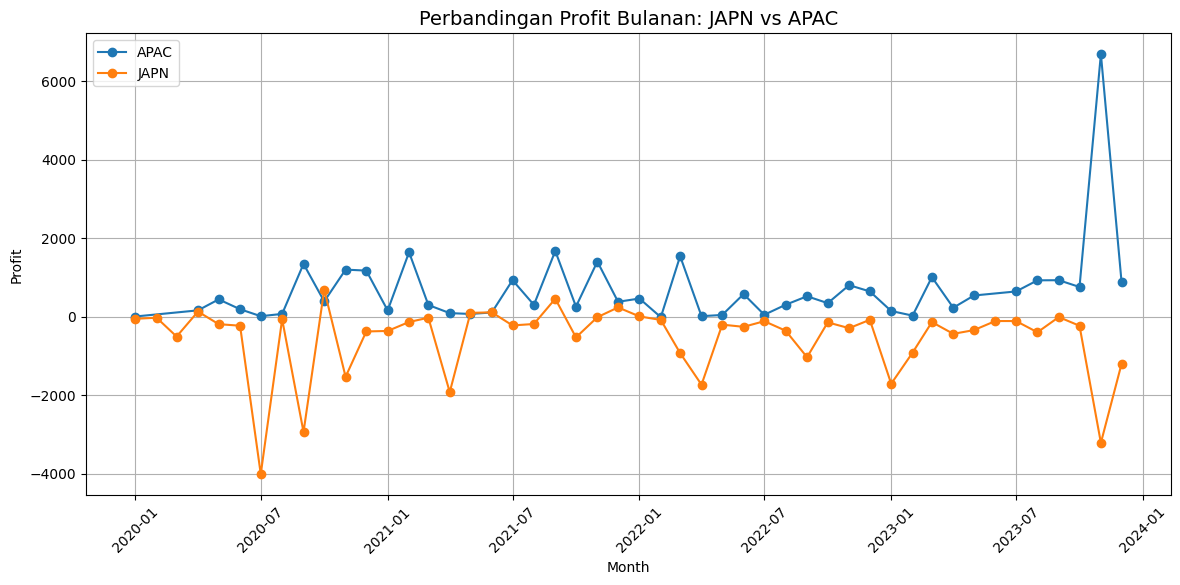

In [34]:
# bikin kolom Year-Month
df['year_month'] = df['Order Date'].dt.to_period('M').astype(str)

# group by per bulan dan subregion
monthly_profit = df.groupby(['year_month', 'Subregion'])['Profit'].sum().reset_index()

# filter data untuk JAPN dan APAC
monthly_profit_filtered = monthly_profit[monthly_profit['Subregion'].isin(['JAPN', 'APAC'])]

# ubah kolom year_month jadi datetime beneran (format pertama hari tiap bulan)
monthly_profit_filtered['year_month'] = pd.to_datetime(monthly_profit_filtered['year_month'], format='%Y-%m')

# urutkan
monthly_profit_filtered = monthly_profit_filtered.sort_values(by='year_month')

# plot ulang
plt.figure(figsize=(14,6))
for region in monthly_profit_filtered['Subregion'].unique():
    data = monthly_profit_filtered[monthly_profit_filtered['Subregion'] == region]
    plt.plot(data['year_month'], data['Profit'], marker='o', label=region)

plt.title("Perbandingan Profit Bulanan: JAPN vs APAC", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Perbandingan Profit JAPN vs APAC

### Trend Bulanan
- Grafik menunjukkan bahwa **APAC** secara konsisten mencatat profit positif sepanjang periode,
  meskipun ada beberapa fluktuasi.  
- Sebaliknya, **JAPN** hampir selalu mencatat profit negatif, dengan beberapa bulan menunjukkan kerugian cukup besar.  
- Insight: Jepang memiliki masalah struktural dalam profitabilitas, berbeda dengan APAC yang lebih stabil.  


In [35]:
# Top 10 produk JAPN by Profit
top_products_japn_profit = (
    df[df['Subregion'] == 'JAPN']
    .groupby('Product')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Produk berdasarkan Profit di JAPN:")
display(top_products_japn_profit)

# Top 10 produk APAC by Profit
top_products_apac_profit = (
    df[df['Subregion'] == 'APAC']
    .groupby('Product')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Produk berdasarkan Profit di APAC:")
display(top_products_apac_profit)


Top 10 Produk berdasarkan Profit di JAPN:


,Profit
Product,
Site Analytics,3222.4608
Alchemy,1629.9615
Support,1585.6908
Data Smasher,1105.8501
SaaS Connector Pack - Gold,848.1760
ChatBot Plugin,316.3538
Storage,80.7357
Marketing Suite - Gold,-763.7054
FinanceHub,-2315.2470


Top 10 Produk berdasarkan Profit di APAC:


,Profit
Product,
Alchemy,5507.9778
ContactMatcher,4566.9955
Site Analytics,4094.9267
FinanceHub,3618.7668
Marketing Suite - Gold,3105.7326
OneView,2098.9360
Support,1896.3014
SaaS Connector Pack,1857.7968
Data Smasher,1322.5158



### Top Produk Berdasarkan Profit (JAPN vs APAC)

#### JAPN
- Produk yang relatif profitable di Jepang: **Site Analytics, Alchemy, Support, Data Smasher**.  
- Namun beberapa produk utama seperti **Marketing Suite** justru memberikan kerugian besar.  
- Hal ini menandakan bahwa meskipun ada produk unggulan, model bisnis di Jepang tidak sustain karena kerugian
  dari produk lain menutup profit produk yang sehat.  

#### APAC
- Produk paling menguntungkan: **Alchemy, ContactMatcher, Site Analytics, FinanceHub**.  
- APAC memiliki kombinasi produk yang lebih seimbang → produk dengan sales tinggi juga cenderung profitable.  
- Ini menunjukkan APAC memiliki strategi pricing dan pemilihan produk yang lebih efektif dibandingkan JAPN.  

## Insight Utama
1. **JAPN = High Sales, Negative Profit**  
   → meski kontribusi sales Jepang cukup besar (Top 5 subregion), profitabilitasnya sangat buruk (-25k).  
2. **APAC lebih sehat**  
   → meskipun kontribusi sales lebih kecil dari JAPN, profit APAC positif (30k) dan stabil.  
3. **Produk bermasalah di JAPN**  
   → *Marketing Suite* dan *FinanceHub* cenderung merugi.  
4. **Produk unggulan konsisten**  
   → *Alchemy* dan *Site Analytics* tetap muncul sebagai kontributor positif di kedua subregion.  

## Rekomendasi
1. **Optimasi Pricing di JAPN**  
   - Batasi diskon maksimum (contoh: tidak lebih dari 40%) untuk mencegah transaksi high sales tetapi merugi.  
   - Review struktur harga untuk produk seperti *Marketing Suite*.  

2. **Fokus Produk Unggulan**  
   - Dorong penetrasi produk *Alchemy* dan *Site Analytics* di JAPN, karena terbukti profitabilitasnya positif.  
   - Bundling produk bermasalah dengan produk unggulan untuk meningkatkan margin.  

3. **Evaluasi Produk Rugi**  
   - *Marketing Suite* (utama dan Gold) → kandidat untuk redesign pricing atau bahkan discontinue di Jepang.  
   - *FinanceHub* → evaluasi karena inkonsisten (profit di APAC tapi merugi di JAPN).  

4. **Strategi Subregion**  
   - APAC sudah profitable → tingkatkan investasi dan marketing di sana.  
   - JAPN → jangan langsung merger dengan APAC tanpa perbaikan, karena akan “menulari” kerugian.  
   - Lebih baik jalankan **program perbaikan khusus JAPN** (pricing, diskon, dan seleksi produk).  